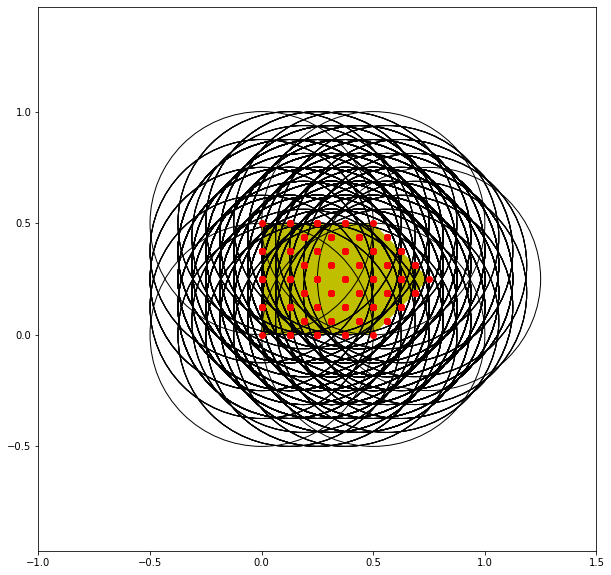

In [1]:
"""
Runs the proof of Corollary 0.0.4 in R2 on some polygon
Author: Arian Nadjimzadah
"""
import numpy as np
import matplotlib.pyplot as plt
import itertools as it

"""
Function to enumerate strings of length k over alphabet of size N
"""
def enumerateStringsHelper(N, k, prefix, accum):
    if (k == 0):
        accum.append(prefix)
        return
    
    for i in range(N):
        prefNew = prefix.append(i)
        print(prefNew)
        enumerateStringsHelper(N, k-1, prefNew, accum)
        
def enumerateStrings(N, k):
    accum = []
    enumerateStringsHelper(N, k, [], accum)
    return accum

def enumerateList(N, k):
    if (k == 1):
        return [[i] for i in range(N)]
    accum = []
    for i in range(N):
        for s in enumerateList(N, k - 1):
            
            accum.append(s.append(i))
#         accum.extend([s.append(i) for s in enumerateList(N, k-1)])
    return accum
    
import math
# n = 2
eps = 0.50
# N = 10
# A polygon is represented by a list of clockwise points in R2
P = [np.array([0,0]), np.array([0,1/2]),  np.array([1/2,1/2]), np.array([1.5/2,.5/2]), np.array([1/2,0])]

"""
Step 1: Construct the set \mathcal N
"""
k = math.ceil(1 / (eps*eps))
# combs = enumerateList(len(P), k)
# combs = it.product([i for i in range(len(P))], repeat = k)
# print(combs)
scriptN = []
combs = it.product([i for i in range(len(P))], repeat = k)

for comb in combs:
    vec = np.array([0,0])
    for elt in comb:
        vec = vec + P[elt]
    scriptN.append(vec / k)

"""
Plot the radius eps circles centered at points in scriptN
"""
scale = 10
figure, axes = plt.subplots(figsize=(scale, scale))
axes.axis('equal')
axes.set_xlim([-1, 1.5])
axes.set_ylim([-1,1.5])
plt.fill([p[0] for p in P], [p[1] for p in P], 'y', fill = True)
plt.plot([p[0] for p in scriptN], [p[1] for p in scriptN], 'or')
for p in scriptN:
    axes.add_artist(plt.Circle((p[0], p[1]), eps, fill = False))







In [ ]:
"""
How can we more efficiently cover our polygon using only a subset of these circles?
Corollary 0.0.4 is rather wasteful...
"""


"""
Attempt 1: Can we remove circles at random to find a covering?
"""
